In [3]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import math

In [4]:
data="""
S,p,success,time
10,0.1,0.69,0.00038
10,0.01,0.06,0.00031
10,0.001,0.0,0.00032
10,0.0001,0.0,0.00031
10,1.0e-05,0.0,0.00031
100,0.1,1.0,0.00223
100,0.01,0.71,0.00227
100,0.001,0.09,0.00223
100,0.0001,0.0,0.00224
100,1.0e-05,0.0,0.00224
1000,0.1,1.0,0.02105
1000,0.01,1.0,0.02134
1000,0.001,0.6,0.01964
1000,0.0001,0.1,0.018
1000,1.0e-05,0.03,0.01805
10000,0.1,1.0,0.18011
10000,0.01,1.0,0.18211
10000,0.001,1.0,0.1827
10000,0.0001,0.64,0.18185
10000,1.0e-05,0.07,0.17845
100000,0.1,1.0,1.79083
100000,0.01,1.0,1.81104
100000,0.001,1.0,1.80005
100000,0.0001,1.0,1.80025
100000,1.0e-05,0.67,1.90284
"""

In [7]:
data_io = StringIO(data)
df = pd.read_csv(data_io, sep=",")

In [8]:
grouped_samples = df.groupby('S')
grouped_prob = df.groupby('p')

grouped_s = {}
for g, gd in grouped_samples:
  small_gds = gd.set_index("p", inplace=False)
  small_gds.drop(columns=["time","S"], inplace=True)
  
  grouped_s[g] =small_gds

grouped_p = {}
for g, gd in grouped_prob:
  small_gdp = gd.set_index("S", inplace=False)
  small_gdp.drop(columns=["time","p"], inplace=True)

  grouped_p[g] =small_gdp

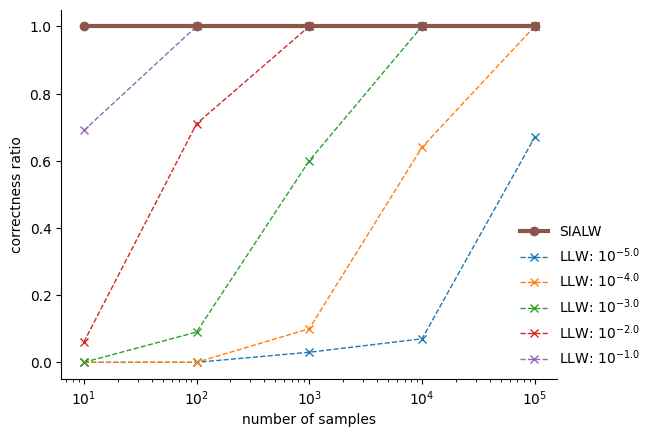

In [11]:
fig, ax = plt.subplots()

labels = []

alw_x = [10, 100, 1000, 10000, 100000]
alw_y = [1, 1, 1, 1, 1]

for df_name, df in grouped_p.items():
    # Assuming the DataFrame has x and y columns, adjust this accordingly
    x = df.index
    y = df['success']

    line, =ax.semilogx(x, y, label=df_name,  marker='x',linestyle='--', linewidth=1.0)


    labels.append((line,  r"" + f"LLW: $10^{{{math.log10(df_name)}}}$"))

line, =ax.semilogx(alw_x, alw_y, label=df_name,  marker='o',linestyle='-', linewidth=3.0)

labels.insert(0,(line,  "SIALW"))

# Add labels and a legend
ax.set_xlabel('number of samples')
ax.set_ylabel('correctness ratio')
ax.legend()
ax.legend(*zip(*labels), loc='lower left', bbox_to_anchor=(0.9, 0), frameon=False)


# Remove upper and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('samplesVScorrectness.pdf', bbox_inches='tight', transparent=True)


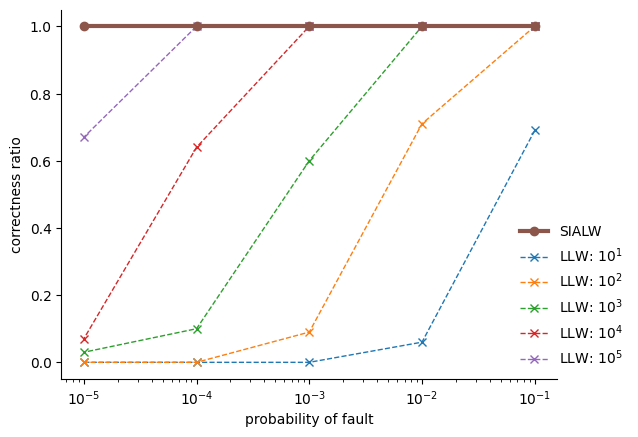

In [12]:
fig, ax = plt.subplots()

labels = []

alw_x = [0.00001, 0.0001, 0.001, 0.01, 0.1]
alw_y = [1, 1, 1, 1, 1]

for df_name, df in grouped_s.items():
    # Assuming the DataFrame has x and y columns, adjust this accordingly
    x = df.index
    y = df['success']

    line, =ax.semilogx(x, y, label=df_name,  marker='x',linestyle='--', linewidth=1.0)


    labels.append((line,  r"" + f"LLW: $10^{{{int(math.log10(df_name))}}}$"))

line, =ax.semilogx(alw_x, alw_y, label=df_name,  marker='o',linestyle='-', linewidth=3.0)

labels.insert(0,(line,  "SIALW"))

# Add labels and a legend
ax.set_xlabel('probability of fault')
ax.set_ylabel('correctness ratio')
ax.legend()
ax.legend(*zip(*labels), loc='lower left', bbox_to_anchor=(0.9, 0), frameon=False)


# Remove upper and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('faultVScorrectness.pdf', bbox_inches='tight', transparent=True)
